In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from PIL import Image
import os
from keras.models import load_model

Using TensorFlow backend.


In [2]:
# function to convert image to array of tile arrays
def arraytiler(image, tilesize, stride):
    
    # get width and height
    w, h = image.size
    
    # trim width and height to make evenly stride-able 
    new_w, new_h = (np.floor(w / stride) * stride, 
                    np.floor(h / stride) * stride)
    
    # redefine image so that it is integer-iterable by square tiles
    image.crop((0, 0, new_w, new_h))
    
    # make empty array
    tiled_list = []
    
    # iterate over image and crop, convert crop to array, and feed arrays to list
    for i_w in range(0, int(new_w - (tilesize - stride)), stride):
        for i_h in range(0, int(new_h - (tilesize - stride)), stride):
            
            # make individual image tiles
            tile = image.crop((i_w, i_h, 
                               i_w + tilesize, i_h + tilesize))
            # convery to array and append to list
            tile_array = np.array(tile)
            tiled_list.append(tile_array)
    
    # convert list of 3D arrays to 4D array, the format for model prediction
    tiled_array = np.array(tiled_list)
    
    return tiled_array


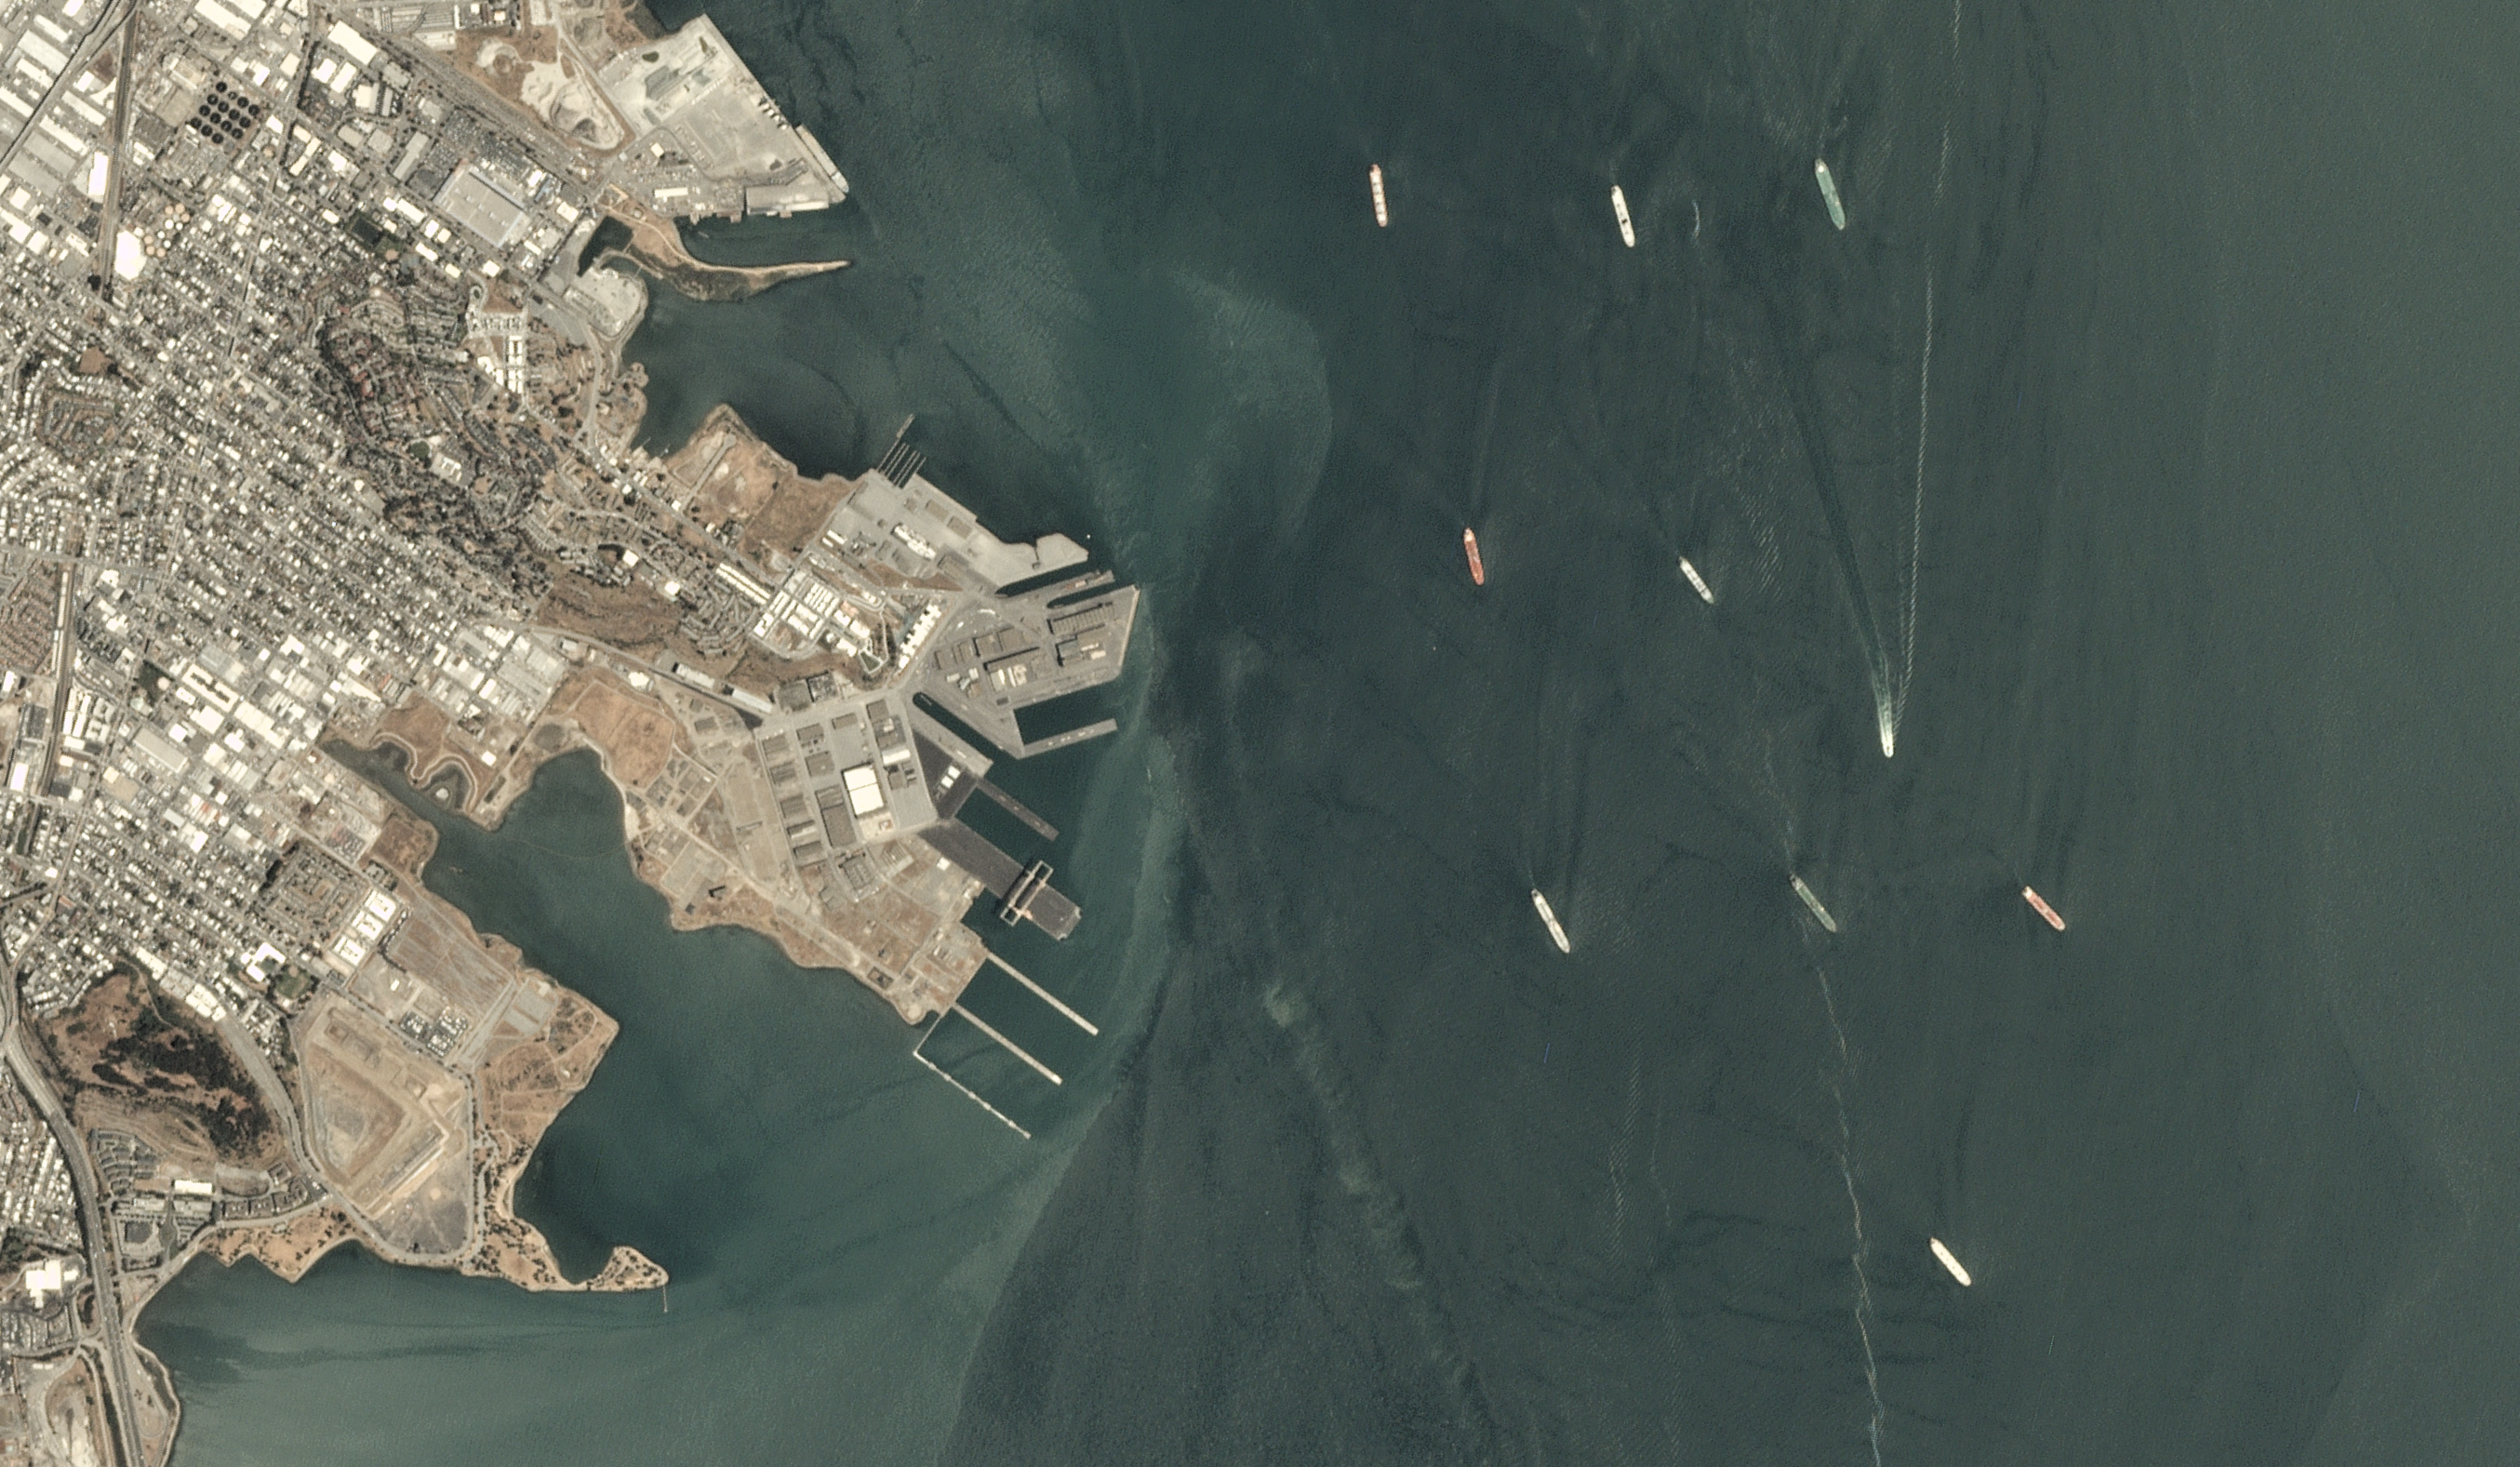

In [19]:
imgfile = os.path.join('scenes', 'sfbay_3.png')
im = Image.open(imgfile)
imgarray = np.array(im)
im

In [27]:
tile_array = arraytiler(im, 80, 15)

In [28]:
tile_array.shape

(17776, 80, 80, 3)

In [29]:
model_dir = os.path.join('Models', 'tanh-adam-categorical_crossentropysave.h5')
singleton = 'singleton.h5'
model = load_model(singleton)

In [30]:
predictions = model.predict(tile_array)
predictions[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [31]:
# get index of tiles that have ships (where predictions[i] = [0., 1.])
results = np.where(predictions[:, 1] == 1.)

In [32]:
results[0]

array([ 5466,  7524,  7544,  9707, 11528, 13925, 14607])

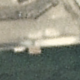

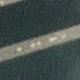

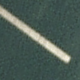

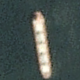

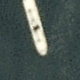

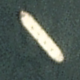

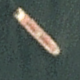

In [34]:
# show tiles that have ships
for i in results[0]:
    display(Image.fromarray(tile_array[i]))